# Imports

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split


from sklearn.metrics import median_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.neighbors import KNeighborsRegressor

pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Data Wrangling

In [6]:
df = pd.read_csv('world_data.csv', index_col=0)

In [7]:
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,99,0.69500,0.76200,0,-3.49700,1,0.03950,0.19200,0.00244,0.08630,0.55300,120.04200,215280,4
1,Travis Scott,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,98,0.59800,0.42700,7,-8.76400,0,0.03170,0.05460,0.00001,0.21000,0.06050,76.46900,175721,4
2,Juice WRLD,Bandit (with YoungBoy Never Broke Again),6Gg1gjgKi2AK4e0qzsR7sd,93,0.47400,0.63100,5,-5.88400,0,0.34300,0.06870,0.00000,0.13200,0.42500,180.05100,189323,4
3,Arizona Zervas,ROXANNE,696DnlkuDOXcMAnKlTgXXK,97,0.62100,0.60100,6,-5.61600,0,0.14800,0.05220,0.00000,0.46000,0.45700,116.73500,163636,5
4,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.50500,0.34000,4,-9.00500,1,0.04380,0.57600,0.00000,0.21000,0.09160,101.99300,206459,4


In [12]:
df.sort_values('danceability', ascending=True).head(20)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
4257,Johann Sebastian Bach,"Johannespassion, BWV 245: Pt.1.No.8. Simon Pet...",6mmoGznn6v3IhPN0r0WLTO,0,0.00000,0.00720,10,-31.53100,1,0.00000,0.97700,0.00000,0.11700,0.00000,0.00000,13776,0
1846,Dream Shard,Street Noise - Wooly Noise,6ewuOVkgZAc0Ss7cafVRee,67,0.00000,0.76600,7,-24.35600,0,0.00000,0.88800,0.50900,0.11200,0.00000,0.00000,173793,0
8218,Hi Freq Samples,Rain & Thunder,0kTRMn9JCXvAe9pRGzqDcV,57,0.00000,0.00196,10,-18.46800,0,0.00000,0.00314,0.92100,0.27300,0.00000,0.00000,150045,0
4247,Johann Sebastian Bach,"Nun Komm Der Heiden Heiland, BWV 599",0NCPaZCWricE3kJEUpGdi1,4,0.00000,0.01340,9,-19.76300,0,0.00000,0.99600,0.87100,0.27600,0.00000,0.00000,83958,0
3651,Natural Woodland Sounds,Meditation Rain,4ilfxYggG4GpbZcpC9qzH5,63,0.00000,0.00002,0,-17.68700,1,0.00000,0.00001,0.99100,0.76700,0.00000,0.00000,126167,0
2552,Sounds of Nature Noise,Soft Thunder,62kBhPaUyrsGzmsaZJ35xh,64,0.00000,0.00014,1,-18.24900,1,0.00000,0.00090,0.83400,0.53900,0.00000,0.00000,179187,0
2175,Naturaleza FX,Colors of the Rain,4UFlnhDTGyKvlhOQziDHkG,66,0.00000,0.00002,1,-16.87300,1,0.00000,0.00001,0.20800,0.31100,0.00000,0.00000,150879,0
6078,Brain Timbre,Rain on the street of Broadway,6nDIEuAjgdWPAL22asN31l,61,0.00000,0.11900,5,-24.24900,1,0.00000,0.15000,0.94700,0.45300,0.00000,0.00000,161071,0
724,Bruce Brus,White Noise Crashing Waves,3AFEx7f9qxc6U59s27Tp1V,75,0.00000,0.00043,0,-14.10500,0,0.00000,0.86200,0.97700,0.16200,0.00000,0.00000,168000,0
7807,Ludwig van Beethoven,"Beethoven: 11 Bagatelles, Op. 119: No. 10, All...",6THqclRwRZpeDREnRqmRxg,0,0.00000,0.14400,4,-22.83100,1,0.00000,0.96600,0.67300,0.16600,0.00000,0.00000,12627,0


In [4]:
def df_info(df):
    print(df.info())
    print()
    print(df.size, df.shape)
    print()
    print(df.isnull().sum())
    print()
    for col in df.columns:
        print(col)
        print('Unique values:', df[col].nunique())
        print()
        print('Datatype:', df[col].dtype)
        print()
        print(df[col].value_counts())
        print('|--------------------|')
        print('|--------------------|')
        print('|--------------------|')
    return df.describe().T

In [5]:
df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9320 entries, 0 to 9319
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9320 non-null   int64  
 1   artist_name       9320 non-null   object 
 2   track_name        9320 non-null   object 
 3   track_id          9320 non-null   object 
 4   popularity        9320 non-null   int64  
 5   danceability      9320 non-null   float64
 6   energy            9320 non-null   float64
 7   key               9320 non-null   int64  
 8   loudness          9320 non-null   float64
 9   mode              9320 non-null   int64  
 10  speechiness       9320 non-null   float64
 11  acousticness      9320 non-null   float64
 12  instrumentalness  9320 non-null   float64
 13  liveness          9320 non-null   float64
 14  valence           9320 non-null   float64
 15  tempo             9320 non-null   float64
 16  duration_ms       9320 non-null   int64  


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9320.00000,4659.50000,2690.59659,0.00000,2329.75000,4659.50000,6989.25000,9319.00000
popularity,9320.00000,50.67564,25.84427,0.00000,43.00000,61.00000,67.00000,100.00000
danceability,9320.00000,0.57435,0.20317,0.00000,0.42600,0.59600,0.73500,0.98100
energy,9320.00000,0.48614,0.27832,0.00002,0.22300,0.53900,0.71100,1.00000
key,9320.00000,5.07618,3.59254,0.00000,2.00000,5.00000,8.00000,11.00000
loudness,9320.00000,-11.16500,8.03604,-45.13600,-16.12925,-7.56400,-5.46375,0.63400
mode,9320.00000,0.65826,0.47432,0.00000,0.00000,1.00000,1.00000,1.00000
speechiness,9320.00000,0.10993,0.11981,0.00000,0.03980,0.05520,0.12400,0.95100
acousticness,9320.00000,0.44162,0.38649,0.00000,0.06940,0.31150,0.91200,0.99600
instrumentalness,9320.00000,0.20526,0.36219,0.00000,0.00000,0.00001,0.17300,0.99800


In [6]:
df['name_length'] = [len(name) for name in df.artist_name]

In [7]:
df.name_length

0       11
1       12
2       10
3       14
4       12
        ..
9315     8
9316    10
9317    10
9318     5
9319    16
Name: name_length, Length: 9320, dtype: int64

In [8]:
df['song_name_length'] = [len(track) for track in df.track_name]

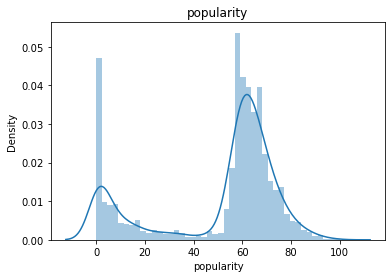

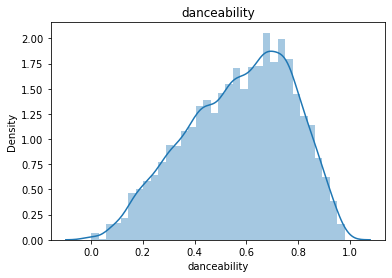

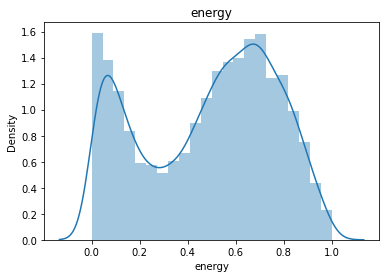

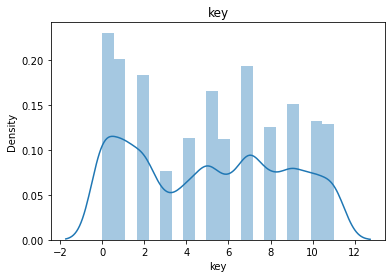

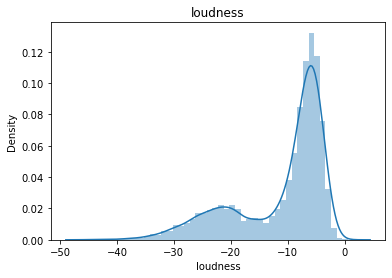

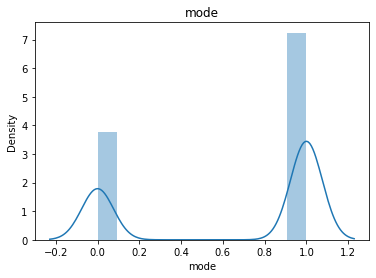

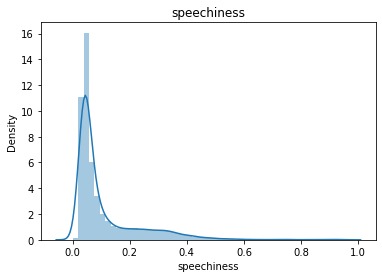

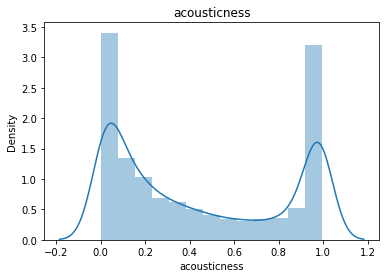

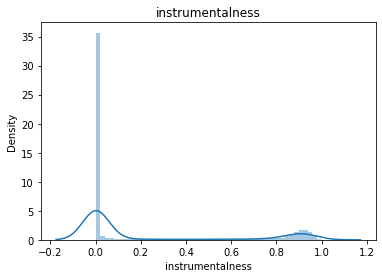

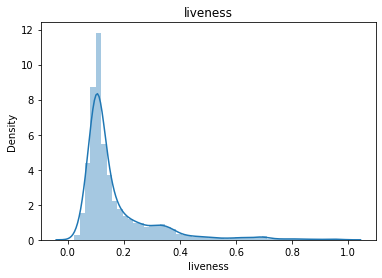

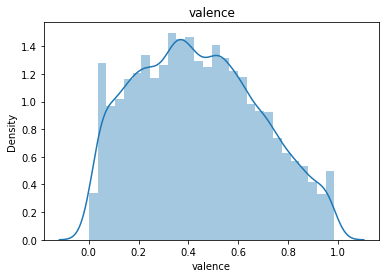

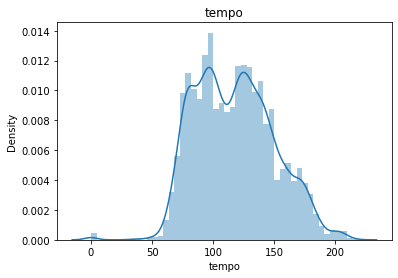

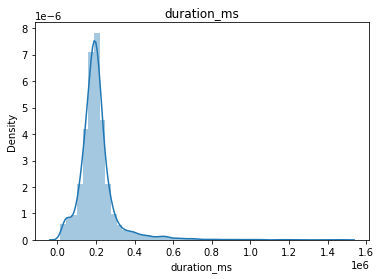

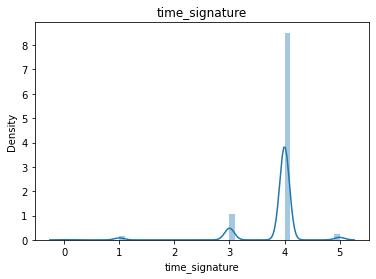

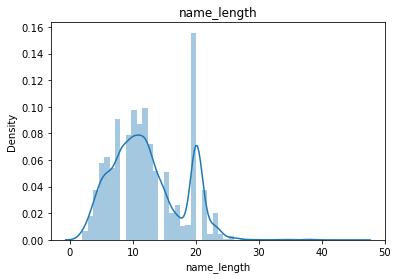

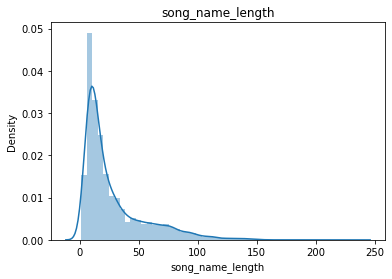

In [9]:
for col in df.drop(columns=['Unnamed: 0', 'artist_name', 'track_name', 'track_id']).columns:
    sns.distplot(df[col])
    plt.title(col)
    plt.show()

Immediate Takeaways:
- The data seems to have been cleaned before acquiring
    > 0 nulls
    >
    > all numeric (excluding artist name, track name, track id)
- will use minmax-scaler for scaling

In [10]:
df.drop(columns=['Unnamed: 0', 'artist_name', 'track_name', 'track_id'], inplace=True)

In [11]:
df['minutes'] = (df.duration_ms / 60000)

In [12]:
df.minutes = pd.cut(df.minutes, bins=[0, 1, 2, 3, 4, 5, 25])

In [13]:
dummy_df = pd.get_dummies(df['minutes'], dummy_na=False, drop_first=False)
dummy_df.head()

# Concatenate the dummy_df dataframe above with the original df and validate.

df = pd.concat([df, dummy_df], axis=1)
df.head(1)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,time_signature,name_length,song_name_length,minutes,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 25]"
0,99,0.69500,0.76200,0,-3.49700,1,0.03950,0.19200,0.00244,0.08630,...,4,11,7,"(3, 4]",0,0,0,1,0,0


In [14]:
df.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,time_signature,name_length,song_name_length,minutes,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 25]"
0,99,0.69500,0.76200,0,-3.49700,1,0.03950,0.19200,0.00244,0.08630,...,4,11,7,"(3, 4]",0,0,0,1,0,0
1,98,0.59800,0.42700,7,-8.76400,0,0.03170,0.05460,0.00001,0.21000,...,4,12,19,"(2, 3]",0,0,1,0,0,0
2,93,0.47400,0.63100,5,-5.88400,0,0.34300,0.06870,0.00000,0.13200,...,4,10,40,"(3, 4]",0,0,0,1,0,0
3,97,0.62100,0.60100,6,-5.61600,0,0.14800,0.05220,0.00000,0.46000,...,5,14,7,"(2, 3]",0,0,1,0,0,0
4,98,0.50500,0.34000,4,-9.00500,1,0.04380,0.57600,0.00000,0.21000,...,4,12,19,"(3, 4]",0,0,0,1,0,0


In [15]:
def train_validate_test_split(df, seed=117):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    return train, validate, test
train, validate, test = train_validate_test_split(df, seed=117)

In [16]:
print(f'train -> {train.shape}, {round(len(train)/len(df)*100, 2)}%')
print(f'validate -> {validate.shape}, {round(len(validate)/len(df)*100, 2)}%')
print(f'test -> {test.shape}, {round(len(test)/len(df)*100, 2)}%')

train -> (5219, 23), 56.0%
validate -> (2237, 23), 24.0%
test -> (1864, 23), 20.0%


In [17]:
train.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,time_signature,name_length,song_name_length,minutes,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 25]"
4012,28,0.27300,0.05580,2,-23.82900,0,0.05140,0.98200,0.95900,0.11800,...,4,21,53,"(3, 4]",0,0,0,1,0,0
1749,73,0.72000,0.86400,0,-3.24900,1,0.20800,0.08560,0.00000,0.16000,...,4,4,25,"(3, 4]",0,0,0,1,0,0
8289,62,0.70700,0.81800,7,-4.89100,1,0.03910,0.07020,0.00002,0.10500,...,4,7,28,"(3, 4]",0,0,0,1,0,0
7538,4,0.19700,0.02960,10,-23.75700,1,0.12300,0.99200,0.00000,0.16700,...,5,20,70,"(0, 1]",1,0,0,0,0,0
2275,69,0.25900,0.07650,1,-28.36400,1,0.03040,0.99300,0.87500,0.10100,...,4,11,20,"(2, 3]",0,0,1,0,0,0


# Explore

In [18]:
def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, target, cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, target, quant)

def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()
    plot_all_continuous_vars(train, target, quant_vars)
    plt.show()    


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats

def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
    p = plot_cat_by_target(train, target, cat_var)

    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")
    
## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

def plot_cat_by_target(train, target, cat_var):
    p = plt.figure(figsize=(2,2))
    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
    overall_rate = train[target].mean()
    p = plt.axhline(overall_rate, ls='--', color='gray')
    return p


## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)


### Multivariate

def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing the target variable. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()

def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()


In [19]:
for col in df.columns:
    print(df[col].dtype)

int64
float64
float64
int64
float64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
category
uint8
uint8
uint8
uint8
uint8
uint8


In [20]:
def standard_scaler(train, validate, test):
    '''
    Accepts three dataframes and applies a standard scaler to convert values in each dataframe
    based on the mean and standard deviation of each dataframe respectfully. 
    Columns containing object data types are dropped, as strings cannot be directly scaled.
    Parameters (train, validate, test) = three dataframes being scaled
    
    Returns (scaler, train_scaled, validate_scaled, test_scaled)
    '''
    # Remove columns with object data types from each dataframe
    train = train.select_dtypes(exclude=['category'])
    validate = validate.select_dtypes(exclude=['category'])
    test = test.select_dtypes(exclude=['category'])
    # Fit the scaler to the train dataframe
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(train)
    # Transform the scaler onto the train, validate, and test dataframes
    train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])
    validate_scaled = pd.DataFrame(scaler.transform(validate), columns=validate.columns.values).set_index([validate.index.values])
    test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])
    return scaler, train_scaled, validate_scaled, test_scaled

scaler, train_scaled, validate_scaled, test_scaled = standard_scaler(train, validate, test)

In [21]:
train_scaled.head(3)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,duration_ms,time_signature,name_length,song_name_length,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 25]"
4012,-0.90799,-1.49564,-1.55497,-0.83574,-1.57215,-1.40431,-0.49446,1.40762,2.09534,-0.38892,...,-0.16483,0.25609,1.61295,0.96873,-0.20220,-0.25812,-0.63538,1.18629,-0.35222,-0.30456
1749,0.85582,0.71544,1.34784,-1.39126,0.97556,0.71209,0.80664,-0.91648,-0.56236,-0.07620,...,-0.13924,0.25609,-1.49319,-0.08084,-0.20220,-0.25812,-0.63538,1.18629,-0.35222,-0.30456
8289,0.42467,0.65113,1.18262,0.55308,0.77228,0.71209,-0.59665,-0.95641,-0.56231,-0.48571,...,-0.18636,0.25609,-0.94504,0.03162,-0.20220,-0.25812,-0.63538,1.18629,-0.35222,-0.30456


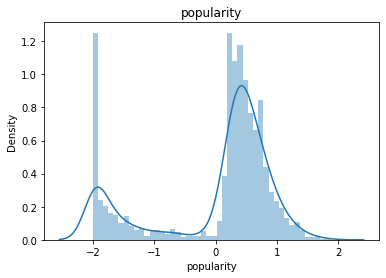

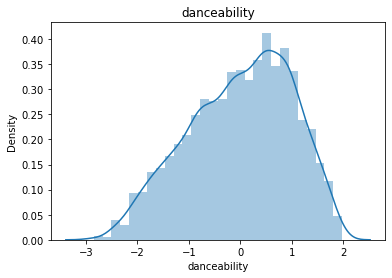

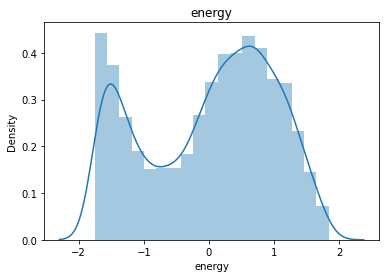

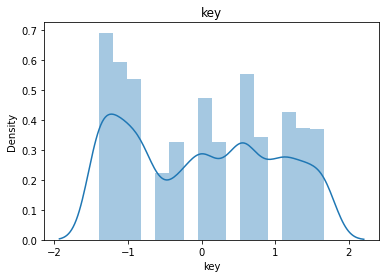

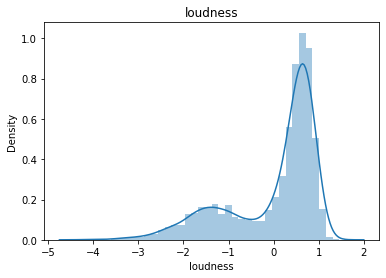

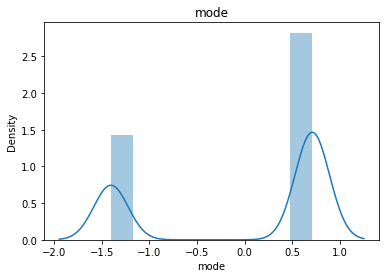

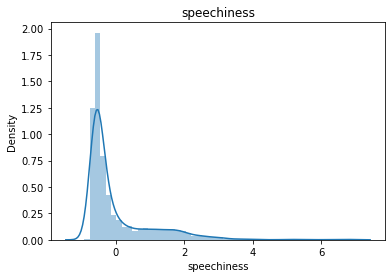

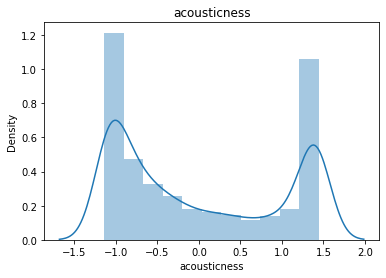

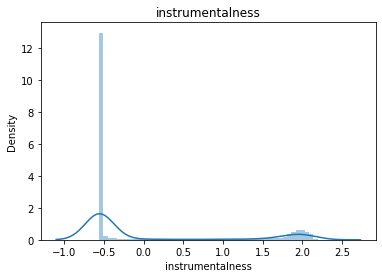

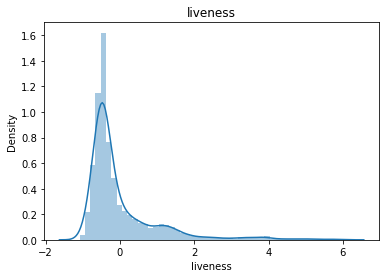

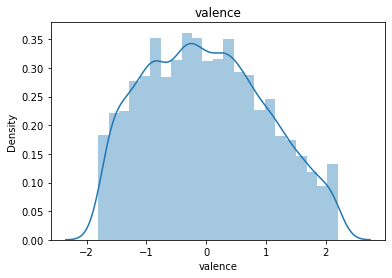

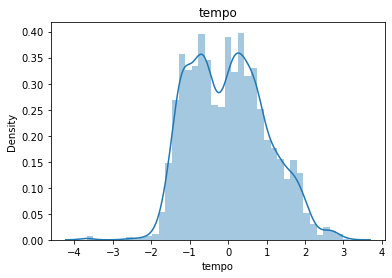

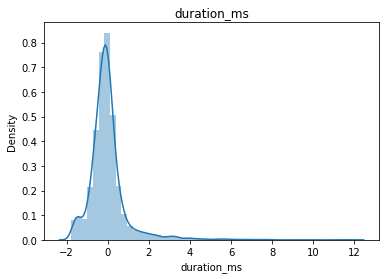

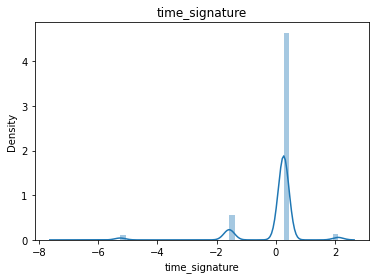

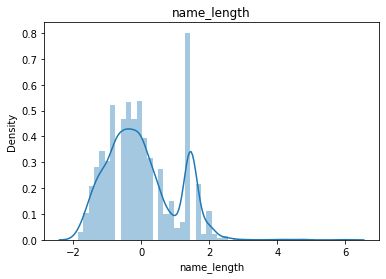

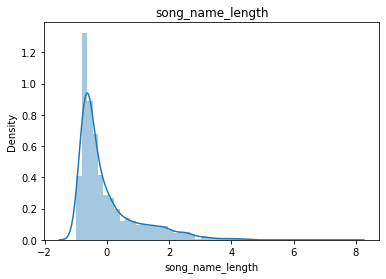

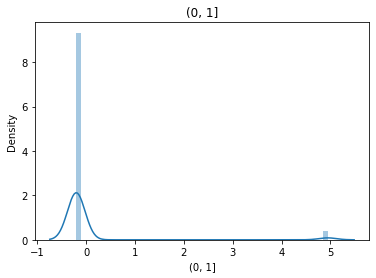

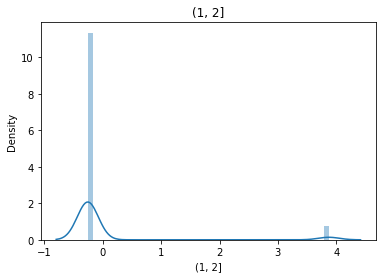

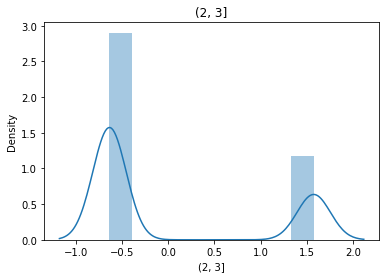

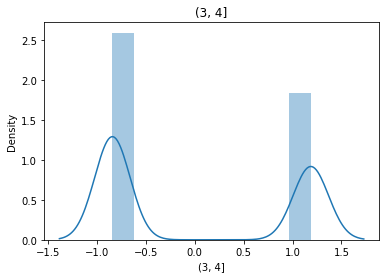

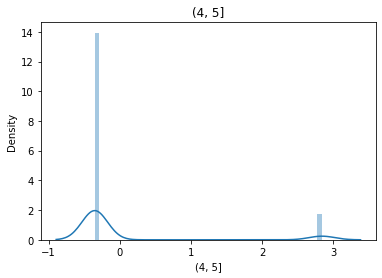

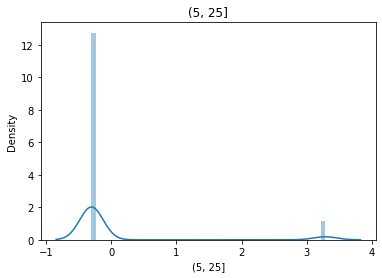

In [22]:
for col in train_scaled.columns:
    sns.distplot(train_scaled[col])
    plt.title(col)
    plt.show()

In [23]:
train.danceability.value_counts(bins=4)

(0.488, 0.731]        2151
(0.244, 0.488]        1361
(0.731, 0.975]        1343
(-0.001975, 0.244]     364
Name: danceability, dtype: int64

In [ ]:
sns.pairplot(train, corner=True)

In [ ]:
for col in train.drop(columns=['danceability', 'minutes']).columns:
    sns.regplot(x=train[col], y=train.danceability)
    plt.show()

In [ ]:
sns.boxenplot(x=train.popularity, y=train.liveness, hue=pd.cut(train.danceability, bins=[0, .25, .5, .75, 1]))

In [ ]:
sns.relplot(x=train.popularity, y=train.liveness, hue=pd.cut(train.danceability, bins=[0, .25, .5, .75, 1]), kind='scatter')

In [ ]:
sns.jointplot(data=train, x=train.popularity, y=train.liveness, hue=pd.cut(train.danceability, bins=[0, .25, .5, .75, 1]))

In [ ]:
for col in train.drop(columns=['danceability', 'minutes']).columns:
    sns.boxenplot(data=train, x=col, y=pd.cut(train.danceability, bins=[0, .25, .5, .75, 1]))
    plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(train.corr()['danceability'].sort_values(ascending=False)), annot=True, cmap='viridis')

## Hypothesis Testing

In [ ]:
categorical = ["minutes",
              "mode",
              "key",
              "time_signature",
              "popularity"]
continuous = ["energy",
              "loudness",
              "speechiness",
              "acousticness",
              "instrumentalness",
              "liveness",
              "valence",
              "tempo",
              "song_name_length",
              "name_length"]
target = 'danceability'

#### Spearman R Test
$H_{0}$: There is no correlation
    
$H_{a}$: There is a correlation

In [ ]:
alpha = 0.05

In [ ]:
for con in continuous:
    rho, pval = stats.spearmanr(train_scaled[con], train_scaled[target])
    if alpha > pval:
        print('We reject the null hypothesis!')
        print(f'{con} and danceability are linearly correlated')
        print(f'rho = {rho}')
        print('|-----------------|')
        print()
    else:
        print('We fail to reject the null hypothesis!')
        print(f'{con} and danceability are not linearly correlated')
        print('|-----------------|')
        print()

---

For our categorical variables, lets run the chi-square test by binning danceability.

In [ ]:
for cat in categorical:
    print(cat)

In [ ]:
for cat in categorical:
    print(f"For {cat}:")
    print()
    observed = pd.crosstab(train[cat], pd.cut(train.danceability, bins=train.danceability.quantile([0, .25, .5, .75, 1])))
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    null_hypothesis = f"{cat} and danceability are independent"

    if p < alpha:
        print("We reject the hypothesis that", null_hypothesis)
        print()
        print(f"Chi-squred: {chi2} \n p-value: {p} \n degrees-of-freedom: {degf}")
        print()
    else:
        print("We fail to reject the null hypothesis")
        print()
    print('|----------------|')
    print('|----------------|')


---
# Modeling

**Let's split the datasets for modeling**

In [ ]:
def X_y_split(train, validate, test, target):
    """
    Functions that takes in trainm validate, test, and target var and split to X and y datasets
    """
    # Setup X and y
    X_train = train.drop(columns=target)
    y_train = train[target]

    X_validate = validate.drop(columns=target)
    y_validate = validate[target]

    X_test = test.drop(columns=target)
    y_test = test[target]
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = X_y_split(train, validate, test, 'danceability')

In [ ]:
X_train.shape, \
y_train.shape

In [ ]:
X_validate.shape, \
y_validate.shape

In [ ]:
X_test.shape, \
y_test.shape

In [ ]:
X_train_scaled, y_train_scaled, X_validate_scaled, y_validate_scaled, X_test_scaled, y_test_scaled = X_y_split(train_scaled, validate_scaled, test_scaled, 'danceability')

In [ ]:
X_train.head(3)

### Baseline Model

Mean:

In [ ]:
#turning my y_train and y_validate to dataframes so we can append new columns
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [ ]:
#danceability mean
mean_baseline = y_train['danceability'].mean()
y_train['mean_baseline'] = mean_baseline
y_validate['mean_baseline'] = mean_baseline

#RMSE of danceability
rmse_train_mean = mean_squared_error(y_train.danceability, y_train.mean_baseline)**(1/2)
rmse_validate_mean = mean_squared_error(y_validate.danceability, y_validate.mean_baseline)**(1/2)

#R^2 Score of mean
r2_baseline_mean = r2_score(y_validate.danceability, y_validate.mean_baseline)

print('             BASELINE')
print('----------------------------------')
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train_mean, 4), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_mean, 4))

Median:

In [ ]:
#danceability median
median_baseline = y_train['danceability'].median()
y_train['median_baseline'] = median_baseline
y_validate['median_baseline'] = median_baseline

#RMSE of danceability
rmse_train_median = mean_squared_error(y_train.danceability, y_train.median_baseline)**(1/2)
rmse_validate_median = mean_squared_error(y_validate.danceability, y_validate.median_baseline)**(1/2)

#R^2 Score of median
r2_baseline_median = r2_score(y_validate.danceability, y_validate.median_baseline)

print('             BASELINE')
print('----------------------------------')
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train_median, 4), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_median, 4))

Mean performed slightly better than the median, so mean will be the baseline model.

In [ ]:
def regression_errors(df, y, yhat):
    residual = df[yhat] - df[y]
    residual_sq = residual**2
    SSE = residual_sq.sum()
    ESS = ((df[yhat] - df[y].mean())**2).sum()
    TSS = SSE + ESS
    MSE = SSE/len(df[y])
    RMSE = MSE**0.5
    return SSE, ESS, TSS, MSE, RMSE

In [ ]:
# Get baseline model metrics to compare future models
SSE_baseline, ESS_baseline, TSS_baseline, MSE_baseline, RMSE_baseline = regression_errors(y_train, 'danceability', 'mean_baseline')

# Create dataframe to hold metrics
df_baseline_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE', 'R2']), columns=['metric'])
df_baseline_eval['baseline_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline, r2_baseline_mean])
df_baseline_eval

In [ ]:
def select_feats(scaled_df, k, target):
    # kbest
    kbest = SelectKBest(f_regression, k=k)
    kbest.fit(scaled_df, target)
    X_kbest = scaled_df.columns[kbest.get_support()]

    # recursive feature elimination
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=k)
    rfe.fit(scaled_df, target)
    X_rfe = scaled_df.columns[rfe.get_support()]
    return X_kbest, X_rfe

In [ ]:
# Find best features to use for future models
X_kbest, X_rfe = select_feats(X_train_scaled, 12, y_train.danceability)
X_kbest, X_rfe

## OLS

In [ ]:
# create the model
ols = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
ols.fit(X_train_scaled[X_rfe], y_train_scaled['danceability'])

# predict train
y_train_scaled['ols_yhat'] = ols.predict(X_train_scaled[X_rfe])

# evaluate: danceability
rmse_train = mean_squared_error(y_train_scaled['danceability'], y_train_scaled['ols_yhat'])**(1/2)

# predict validate
y_validate_scaled['ols_yhat'] = ols.predict(X_validate_scaled[X_rfe])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate_scaled['danceability'], y_validate_scaled['ols_yhat'])**(1/2)

print("RMSE for OLS\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = regression_errors(y_train, 'danceability', 'ols_yhat')
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE', 'R2']), columns=['metric'])
df_eval['baseline_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline, r2_baseline_mean])

df_eval['ols_error'] = np.array([SSE, MSE, RMSE, r2_score(y_train.danceability, y_train.ols_yhat)])
df_eval

## LassoLars

In [ ]:
# create the model object
lars = LassoLars(alpha=1)
X_rfe
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled[X_rfe], y_train['danceability'])

# predict train
y_train['lars_yhat'] = lars.predict(X_train_scaled[X_rfe])

# evaluate: rmse
rmse_train = mean_squared_error(y_train['danceability'], y_train['lars_yhat'])**(1/2)

# predict validate
y_validate['lars_yhat'] = lars.predict(X_validate_scaled[X_rfe])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['danceability'], y_validate['lars_yhat'])**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = regression_errors(y_train, 'danceability', 'lars_yhat')

df_eval['lars/las_error'] = np.array([SSE, MSE, RMSE, r2_score(y_train.danceability, y_train.lars_yhat)])
df_eval

## Poly Regressor

In [ ]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train_scaled[X_rfe])

# transform X_validate_scaled
X_validate_degree3 = pf.transform(X_validate_scaled[X_rfe])

# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.danceability)

# predict train
y_train['lm3_yhat'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.danceability, y_train.lm3_yhat)**(1/2)

# predict validate
y_validate['lm3_yhat'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.danceability, y_validate.lm3_yhat)**(1/2)

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = regression_errors(y_train, 'danceability', 'lm3_yhat')

df_eval['polyr_error'] = np.array([SSE, MSE, RMSE, r2_score(y_train.danceability, y_train.lm3_yhat)])

df_eval

## KNN Regressor

In [ ]:
knr = KNeighborsRegressor(n_neighbors=10,
                          weights='uniform',
                          algorithm='kd_tree',
                          leaf_size=30,
                         )
knr.fit(X_train_scaled[X_kbest], y_train.danceability)

# predict train
y_train['knr_yhat'] = knr.predict(X_train_scaled[X_kbest])

# evaluate: rmse
rmse_train = mean_squared_error(y_train['danceability'], y_train['knr_yhat'])**(1/2)

# predict validate
y_validate['knr_yhat'] = knr.predict(X_validate_scaled[X_kbest])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['danceability'], y_validate['knr_yhat'])**(1/2)

print("RMSE for K-Neighbors Regressor\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = regression_errors(y_train, 'danceability', 'knr_yhat')

df_eval['knr_error'] = np.array([SSE, MSE, RMSE, r2_score(y_train.danceability, y_train.knr_yhat)])
df_eval

---

In [ ]:
# Convert y_test to dataframe for testing
y_test = pd.DataFrame(y_test)

# Fit the model
knr.fit(X_test_scaled[X_kbest], y_test.danceability)

# predict
y_test['knr_yhat_test'] = knr.predict(X_test_scaled[X_kbest])

# evaluate: rmse
rmse_test = mean_squared_error(y_test['danceability'], y_test['knr_yhat_test'])**(1/2)

print("RMSE for K-Neighbor Regressor\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
      "\nTest/Out-of-Sample: ", rmse_test)

In [ ]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = regression_errors(y_validate, 'danceability', 'knr_yhat_test')

df_eval['val_error'] = np.array([SSE, MSE, RMSE, r2_score(y_validate.danceability, y_validate.knr_yhat_test)])
df_eval

In [ ]:
# Compare OLS model metrics to baseline
SSE, ESS, TSS, MSE, RMSE = regression_errors(y_test, 'danceability', 'knr_yhat')

df_eval['test_error'] = np.array([SSE, MSE, RMSE, r2_score(y_test.danceability, y_test.knr_yhat)])
df_eval

In [ ]:
X_train

In [ ]:
y_validate.head(2)

In [ ]:
 # plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.danceability, color='blue', alpha=.5, label="Actual Final Grades")
plt.hist(y_validate.ols_yhat, color='blue', alpha=.5, label="Linear Regression")
plt.hist(y_validate.lars_yhat, color='red', alpha=.5, label="LassoLars")
plt.hist(y_validate.lm3_yhat, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.knr_yhat, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Comparing the Distribution of Actual Grades to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()